#Essential Library

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import os
import PIL.Image as Image
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#Transfer Learning

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE, IMAGE_SHAPE+(3,)

((224, 224), (224, 224, 3))

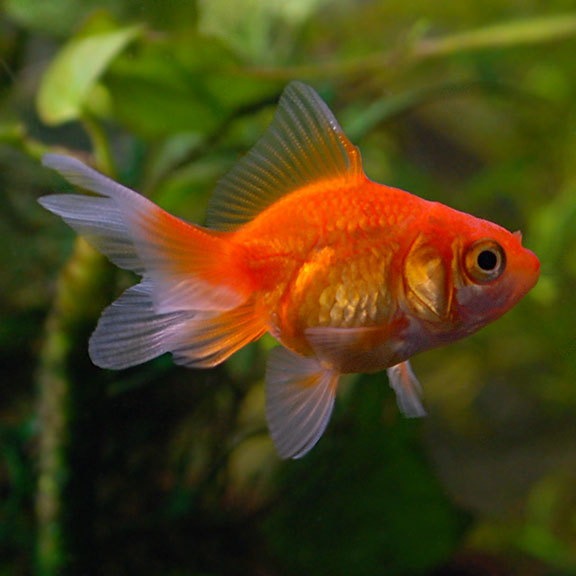

In [5]:
Image.open('goldfish.jpg')

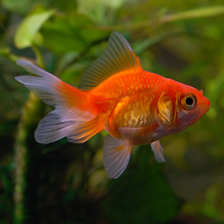

In [6]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [7]:
gold_fish = np.array(gold_fish)/255.0 

Adding new dimension

In [43]:
gold_fish[np.newaxis, ...,].shape

(1, 224, 224, 3)

In [45]:
result = classifier.predict(gold_fish[np.newaxis, ...]) #prediction of all classes 1000

In [10]:
result.shape

(1, 1001)

In [11]:
result

array([[ 0.22107837,  2.0497704 ,  9.622821  , ..., -1.4619302 ,
        -0.28231004, -0.2591613 ]], dtype=float32)

In [12]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [13]:
# image_labels = []
# with open('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/18_transfer_learning/ImageNetLabels.txt', 'r' ) as f:
#     image_labels = f.read().splitlines()
# image_labels[:5]

image_labels = pd.read_csv('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/18_transfer_learning/ImageNetLabels.txt',header = None)
image_labels = image_labels.values.tolist() #numpy array --> to list ->list2d
image_labels = list(np.concatenate(image_labels).flat) #2D to 1D list
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [14]:
predicted_label_index, image_labels[predicted_label_index]

(2, 'goldfish')

Working on flower dataset

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

228827136/228813984 [==============================] - 2s 0us/step


In [16]:
import pathlib #helps in managing files in directory
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [17]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/18970601002_d70bc883a9.jpg'),
 PosixPath('datasets/flower_photos/dandelion/160456948_38c3817c6a_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18089878729_907ed2c7cd_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/17747738311_5014b1f77f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8956863946_f96be02aae_n.jpg')]

In [18]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [19]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg'),
 PosixPath('datasets/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('datasets/flower_photos/roses/6039330368_c30ed224c4_m.jpg'),
 PosixPath('datasets/flower_photos/roses/353897245_5453f35a8e.jpg'),
 PosixPath('datasets/flower_photos/roses/1446097778_97149b8362.jpg')]

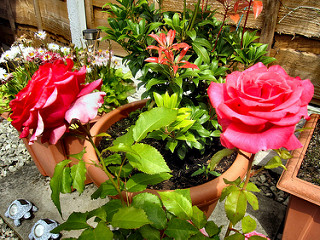

In [20]:
Image.open(str(roses[0]))

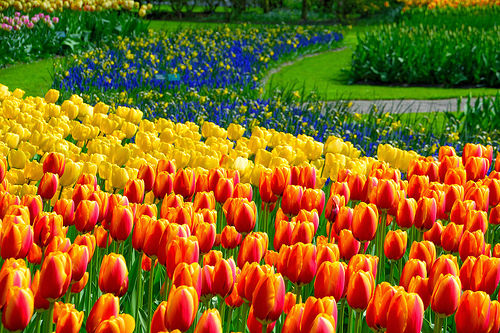

In [21]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [22]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [23]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg'),
 PosixPath('datasets/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('datasets/flower_photos/roses/6039330368_c30ed224c4_m.jpg'),
 PosixPath('datasets/flower_photos/roses/353897245_5453f35a8e.jpg'),
 PosixPath('datasets/flower_photos/roses/1446097778_97149b8362.jpg')]

In [24]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [25]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg')

In [26]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5990626258_697f007308_n.jpg'

In [27]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))  #pass path in str and it returns numpy array
img

array([[[ 14,  23,  36],
        [ 11,  20,  33],
        [ 16,  23,  38],
        ...,
        [ 44,  86, 115],
        [ 46,  85, 117],
        [ 35,  73, 105]],

       [[ 24,  33,  47],
        [ 22,  30,  47],
        [ 22,  30,  47],
        ...,
        [ 20,  70,  93],
        [ 40,  89, 115],
        [ 42,  89, 117]],

       [[ 24,  34,  52],
        [ 21,  31,  49],
        [ 21,  31,  49],
        ...,
        [ 40,  90, 110],
        [ 56, 104, 128],
        [ 73, 119, 143]],

       ...,

       [[108, 125, 151],
        [168, 178, 212],
        [205, 226, 224],
        ...,
        [ 52,  85, 164],
        [ 53,  87, 163],
        [ 55,  90, 164]],

       [[107, 120, 112],
        [134, 152, 159],
        [121, 144, 146],
        ...,
        [ 53,  86, 165],
        [ 53,  87, 163],
        [ 53,  88, 162]],

       [[144, 163, 176],
        [ 92, 138, 139],
        [ 71, 113, 125],
        ...,
        [ 55,  88, 167],
        [ 52,  87, 161],
        [ 50,  85, 159]]

In [28]:
X, y = [] , []

for flower_name , img_path in flowers_images_dict.items(): #items -> key, value
    for path in img_path:
        img = cv2.imread(str(path))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [31]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

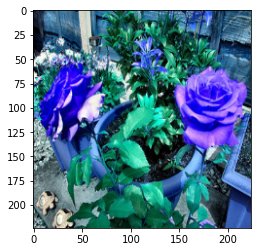

In [32]:
plt.imshow(X[0]) #NOT plt.show

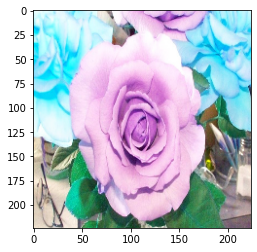

In [33]:
plt.imshow(X[1])

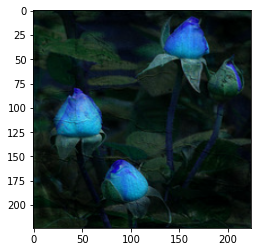

In [34]:
plt.imshow(X[2])

In [35]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted

array([[ 0.3076361 , -0.70044196,  1.1201487 , ..., -1.694869  ,
        -1.8777511 ,  4.8734055 ],
       [ 0.35618052,  0.115459  ,  1.9572116 , ..., -1.6232566 ,
        -0.41530073,  4.5206842 ],
       [ 0.21391404, -1.368388  ,  2.133839  , ..., -1.362537  ,
        -1.1303427 ,  4.1417956 ]], dtype=float32)

In [46]:
predicted.shape

(3,)

In [36]:
predicted = np.argmax(predicted, axis = 1) #NOT COLUMNS use 1
predicted

array([722, 795, 795])

In [37]:
# feature_extractor_model = '"https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"'
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"   #Note Difference
pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model , input_shape = (224, 224, 3), trainable = False)

In [38]:
num_of_flowers = 5

model = tf.keras.Sequential([
                             
                             #Pretrained Model layers
                            #  pretrained_model_without_top_layer,
                             hub.KerasLayer(feature_extractor_model , input_shape = (224, 224, 3), trainable = False)

                             #Dense Layer
                             tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [39]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
86/86 [==============================] - 6s 30ms/step - loss: 0.8628 - accuracy: 0.6719
Epoch 2/5
86/86 [==============================] - 3s 30ms/step - loss: 0.4254 - accuracy: 0.8521
Epoch 3/5
86/86 [==============================] - 3s 29ms/step - loss: 0.3304 - accuracy: 0.8935
Epoch 4/5
86/86 [==============================] - 3s 30ms/step - loss: 0.2688 - accuracy: 0.9139
Epoch 5/5
86/86 [==============================] - 3s 30ms/step - loss: 0.2295 - accuracy: 0.9317


In [40]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 34ms/step - loss: 0.3745 - accuracy: 0.8638


[0.3744952380657196, 0.8638344407081604]